In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.quantum_info import *
from qiskit.result import *
from qiskit.opflow import X,Y,Z,I,CX

pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp

In [87]:
def toCircuit(operator): #Operator to gate
    qubit_list = list(range(int(np.log(len(operator))/np.log(2)))) 
    toCircuit = QuantumCircuit(len(qubit_list))
    toCircuit.unitary(operator,qubit_list)
    return toCircuit


In [88]:
def qpe1(w_qubits,s_qubits, gate, initial_state = None, trotter = 1):  
    repetition=1
    qpe1 = QuantumCircuit(w_qubits+s_qubits,w_qubits)
    if (initial_state != None):
        qpe1.initialize(initial_state,list(range(w_qubits,w_qubits+s_qubits))) 
    for i in range(w_qubits):
        qpe1.h(i)
    for i in range(trotter): 
        for counting_qubit in range(w_qubits):
            for j in range(repetition):
                qubit_list = [counting_qubit]+list(range(w_qubits,w_qubits+s_qubits))
                qpe1.append(gate,qubit_list)
            repetition *= 2
        repetition = 1
    qpe2 = QFT(w_qubits, 0, True , True) #inverse
    l = [*range(w_qubits)]
    qpe = qpe1.compose(qpe2, l)
    return qpe

In [89]:
def toEignevalue(count,t,n=1):
    w_qubits = len(list(count.keys())[0])
    list1 = []
    if t == 0: 
        display(0)
    else:
        lists = sorted(count, key=count.get, reverse=True)[:n] 
        for j in range(len(lists)):
            lists[j] =  int(str(lists[j]), 2) 
        for j in range(len(lists)):
            list1.append((2*pi*(2**w_qubits - lists[j]))/((2**w_qubits)*t))
            lists[j] = -2*pi*(lists[j])/((2**w_qubits)*t) 
        return lists,list1

eigenvalue: 1.5707963267948966


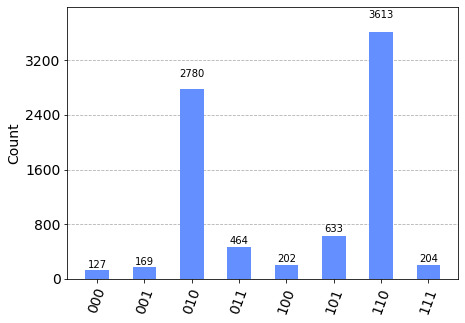

In [90]:

simulator = Aer.get_backend('qasm_simulator')
trotter = 2
t = 1 #time
H = (-2*t/trotter*((X+X+X+X+X)^I))-(t/trotter*((Z^Z)+(Z^Z)+(Z^Z)+(Z^Z)))
U = H.exp_i()
U = U.to_matrix()
H = H.to_matrix()
w_qubits = 3
s_qubits = 2

initial_state = list(v[0])
U_gate = toCircuit(U).to_gate(label = 'U').control(1) #defining U gate
qpe = qpe1(w_qubits,s_qubits,U_gate,initial_state = initial_state,trotter=trotter)

qpe.measure([0,1,2],[0,1,2])
result = execute(qpe, backend=simulator, shots=8192).result()
print('eigenvalue:', toEignevalue(count,t = 1)[1][0])
counts = result.get_counts(qpe)
display(plot_histogram(counts))